In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

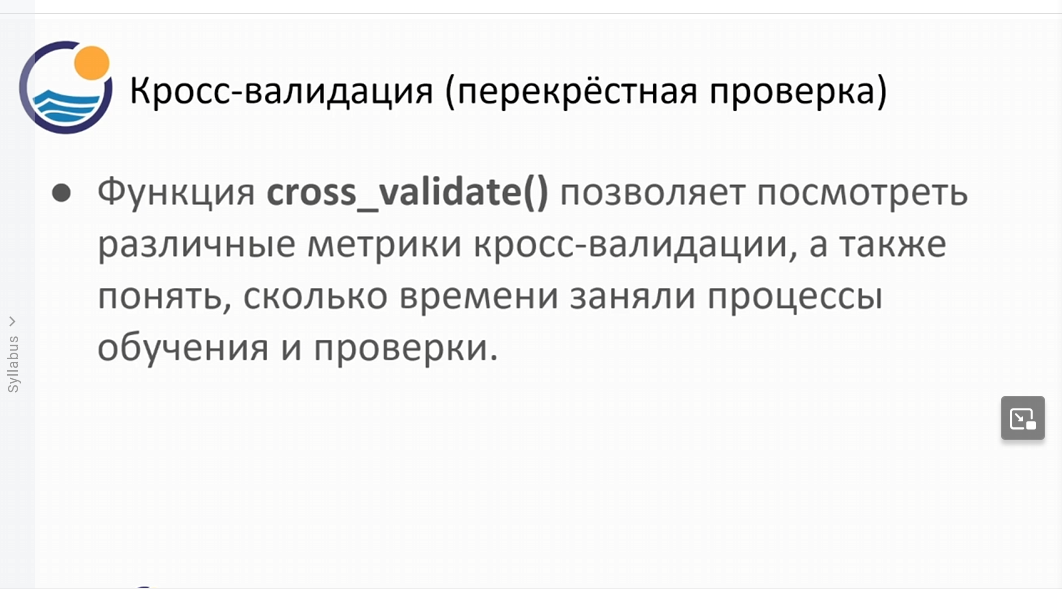

In [3]:
df = pd.read_csv('../DATA/Advertising.csv')

In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.model_selection import cross_validate

In [10]:
from sklearn.linear_model import Ridge

In [11]:
model = Ridge(alpha=100)

In [15]:
scores = cross_validate(model, X_train, y_train,
                         scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                         cv=10)

#this method did 10 fold cross validation on the training set
#computed the mean squared error and mean absolute error for each fold
#measured time taken to fit the model and score it

In [16]:
scores

{'fit_time': array([0.00116897, 0.00088739, 0.00056338, 0.0005331 , 0.00047612,
        0.0005064 , 0.00052619, 0.00051284, 0.00050449, 0.00048304]),
 'score_time': array([0.00083113, 0.00054479, 0.00044036, 0.00043964, 0.00046492,
        0.00044656, 0.00045705, 0.00043535, 0.00044274, 0.00043392]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [17]:
scores = pd.DataFrame(scores)

In [18]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.001169,0.000831,-6.060671,-1.810212
1,0.000887,0.000545,-10.627031,-2.541958
2,0.000563,0.000440,-3.993426,-1.469594
3,0.000533,0.000440,-5.009494,-1.862769
4,0.000476,0.000465,-9.141800,-2.520697
5,0.000506,0.000447,-13.086256,-2.459995
6,0.000526,0.000457,-3.839405,-1.451971
7,0.000513,0.000435,-9.058786,-2.377395
8,0.000504,0.000443,-9.055457,-2.443344
9,0.000483,0.000434,-5.778882,-1.899797


In [19]:
scores.mean()

fit_time                        0.000616
score_time                      0.000494
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [20]:
model = Ridge(alpha=1)

In [22]:
scores = cross_validate(model, X_train, y_train,
               scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
               cv=10)

In [23]:
scores = pd.DataFrame(scores)

In [24]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.001012,0.000659,-2.962508,-1.457174
1,0.000755,0.000505,-3.057378,-1.555308
2,0.000637,0.000540,-2.173740,-1.238770
3,0.000705,0.000617,-0.833034,-0.768938
4,0.001007,0.001012,-3.464018,-1.434489
5,0.001639,0.001171,-8.232647,-1.494316
6,0.000616,0.000484,-1.905864,-1.081362
7,0.000613,0.000472,-2.765048,-1.250011
8,0.000601,0.000500,-4.989505,-1.580971
9,0.000614,0.000508,-2.846438,-1.223326


In [25]:
scores.mean()

fit_time                        0.000820
score_time                      0.000647
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [26]:
model.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [27]:
y_final_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, y_final_pred)
#the estimation of how well the model will perform on unseen data

2.3190215794287514